In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

<ipython-input-3-392f2b8edf63>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


# Explore the data

In [4]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [5]:
df.shape

(7461195, 13)

In [6]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [7]:
df.describe()

,Year of event,Event number of finishers,Athlete year of birth,Athlete ID
count,7.461195e+06,7.461195e+06,6.873034e+06,7.461195e+06
mean,2.011983e+03,1.451969e+03,1.969762e+03,5.536261e+05
std,1.000844e+01,3.124784e+03,1.312560e+01,4.801613e+05
min,1.798000e+03,0.000000e+00,1.193000e+03,0.000000e+00
25%,2.010000e+03,8.800000e+01,1.962000e+03,1.357120e+05
50%,2.015000e+03,2.350000e+02,1.971000e+03,3.944680e+05
75%,2.018000e+03,8.670000e+02,1.979000e+03,1.037699e+06
max,2.022000e+03,2.002700e+04,2.021000e+03,1.641167e+06


## Count of the Event Distance/Length in Descending Order


In [8]:
df.value_counts('Event distance/length', ascending=False).head(40)

Event distance/length
50km      1522609
100km      951742
50mi       352181
56km       333253
87km       212062
89km       187987
24h        183108
100mi      173884
60km       159494
45km       157799
55km       131047
6h         125875
12h        114342
80km        97962
52km        92611
65km        90525
70km        82684
53km        71828
75km        62811
48km        61596
46km        60038
90km        59493
63km        56926
51km        52648
72km        52367
54km        51406
47km        41177
58km        39100
67km        37387
57km        37034
68km        36551
73km        35643
62km        34001
78km        31891
110km       30366
40mi        30208
101km       30098
71.5km      30086
69km        29594
72.7km      28676
dtype: int64

## Count of Athlete's Country

In [9]:
df.value_counts('Athlete country', ascending=False)

Athlete country
USA    1389960
FRA    1170884
RSA     877630
JPN     603132
GER     442056
        ...   
MDG          1
TWN          1
SLE          1
SVE          1
ACT          1
Length: 208, dtype: int64

## Checking for UK Based Athletes In The Dataset

In [10]:
len(df[df['Athlete country'] == 'UK'])

0

## Check the Count for Host

In [11]:
df['Host_Country'] = df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)

In [12]:
df['Host_Country'].value_counts().head(20)

USA    1398540
FRA    1098144
RSA     918916
JPN     579407
ITA     341894
GER     338842
GBR     313727
CHN     213104
ESP     211238
SUI     209065
AUS     148043
TPE     132838
POL     101110
CAN      92628
HKG      75512
KOR      75295
SWE      67105
BEL      64060
AUT      54604
NED      48492
Name: Host_Country, dtype: int64

##### USA has hosted the most number of events with nearly 1.4 million events throughout 2 centeries. This is followed by approximately 1.1 million events been hosted by France and in 3rd place, with approximately 0.92 million events, were hosted in Russia.

In [13]:
country_counts = df['Host_Country'].value_counts()
uk_count = country_counts.get('UK', 0)
uk_count

0

### No UK Based Athletes and Events. 

### We will focus on USA

# Data Cleaning

 #### We Will On Ultramarathons Which Are: 50km, 50 Miles, 100km, and 100 Miles.

## combine 50km, 50 Miles and 100 miles.

In [14]:
df_UltraMarathon = df[df['Event distance/length'].isin(['50km','50mi','100mi'])]

## Create A DataFrame With Events In USA Only During The Year 2022

In [15]:
df_USA_events_2022 = df[(df['Event distance/length'].isin(['50km','50mi','100mi'])) & 
                        (df['Year of event'] == 2022) & 
                        (df['Host_Country'] == 'USA')]

In [16]:
df_USA_events_2022.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Host_Country
3138208,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,7:53:36 h,"*Boston, MA",USA,1994.0,M,M23,10.194,839364,USA
3138209,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:14:24 h,"*Charlotte, NC",USA,1990.0,M,M23,9.765,366598,USA
3138210,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:19:16 h,"*Kannapolis, NC",USA,1979.0,M,M40,9.67,553476,USA
3138211,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:23:49 h,"*Raleigh, NC",USA,1994.0,M,M23,9.583,807555,USA
3138212,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:41:37 h,"*Washington, DC",USA,1997.0,M,M23,9.256,947348,USA


In [17]:
df_USA_events_2022.shape

(68044, 14)

### Count of Each Race By Distance

In [18]:
df_USA_events_2022['Event distance/length'].value_counts()

50km     44091
50mi     14509
100mi     9444
Name: Event distance/length, dtype: int64

#### In 2022, there over 44 thousnad runner, who participated in the 50km run. the 50 mile and 100 mile runs had 14.5 thousand and 9444 participants respectively.

## Remove (USA) From Event Name

In [19]:
df_USA_events_2022['Event name'] = df_USA_events_2022['Event name'].str.split('(').str.get(0)

<ipython-input-19-31a5d26433cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_events_2022['Event name'] = df_USA_events_2022['Event name'].str.split('(').str.get(0)


## Clean Up Athelte's Age

In [20]:
df_USA_events_2022['athlete_Age'] = 2022 - df_USA_events_2022['Athlete year of birth']

<ipython-input-20-e825839a6b33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_events_2022['athlete_Age'] = 2022 - df_USA_events_2022['Athlete year of birth']


## Remove 'h' From Athlete Performance

In [21]:
df_USA_events_2022['Athlete performance'] = df_USA_events_2022['Athlete performance'].str.split(' ').str.get(0)

<ipython-input-21-912472270f7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_events_2022['Athlete performance'] = df_USA_events_2022['Athlete performance'].str.split(' ').str.get(0)


In [22]:
df_USA_events_2022.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Host_Country,athlete_Age
3138208,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,7:53:36,"*Boston, MA",USA,1994.0,M,M23,10.194,839364,USA,28.0
3138209,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:14:24,"*Charlotte, NC",USA,1990.0,M,M23,9.765,366598,USA,32.0
3138210,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:19:16,"*Kannapolis, NC",USA,1979.0,M,M40,9.67,553476,USA,43.0
3138211,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:23:49,"*Raleigh, NC",USA,1994.0,M,M23,9.583,807555,USA,28.0
3138212,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:41:37,"*Washington, DC",USA,1997.0,M,M23,9.256,947348,USA,25.0


In [23]:
df_USA_events_2022['Event dates'].value_counts().tail(10)

05.-06.08.2022    7
27.-28.03.2022    6
25.07.2022        4
02.01.2022        4
26.-27.08.2022    4
12.-13.03.2022    3
22.-24.04.2022    3
13.-14.05.2022    2
14.-16.01.2022    1
08.-09.01.2022    1
Name: Event dates, dtype: int64

#### Some Event dates have a start date and end date in the same column. 

## Create a Start Date and End Date Column

In [24]:
df_USA_events_2022['Start_date'] = df_USA_events_2022['Event dates'].str.extract(r'(\d{2}\.\d{2}\.\d{4})')[0]
df_USA_events_2022['End_date'] = df_USA_events_2022['Event dates'].str.extract(r'[-]*(\d{2}\.\d{2}\.\d{4})')[0]

<ipython-input-24-a84c695614e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_events_2022['Start_date'] = df_USA_events_2022['Event dates'].str.extract(r'(\d{2}\.\d{2}\.\d{4})')[0]
<ipython-input-24-a84c695614e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_events_2022['End_date'] = df_USA_events_2022['Event dates'].str.extract(r'[-]*(\d{2}\.\d{2}\.\d{4})')[0]


## For events that finish on the same date, set the End date to be the same as the Start date

In [25]:
df_USA_events_2022['End_date'] = df_USA_events_2022['End_date'].mask(df_USA_events_2022['Start_date'] == df_USA_events_2022['End_date'], df_USA_events_2022['Start_date'])


<ipython-input-25-dfae1cd8e80f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_events_2022['End_date'] = df_USA_events_2022['End_date'].mask(df_USA_events_2022['Start_date'] == df_USA_events_2022['End_date'], df_USA_events_2022['Start_date'])


In [26]:
df_USA_events_2022['Start_date'].value_counts(ascending = True)

25.07.2022       4
02.01.2022       4
28.03.2022       6
22.08.2022       8
05.08.2022      12
              ... 
17.09.2022    1674
09.04.2022    1925
14.05.2022    2010
19.11.2022    2131
23.04.2022    2305
Name: Start_date, Length: 140, dtype: int64

In [27]:
df_USA_events_2022.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Host_Country,athlete_Age,Start_date,End_date
3138208,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,7:53:36,"*Boston, MA",USA,1994.0,M,M23,10.194,839364,USA,28.0,12.03.2022,12.03.2022
3138209,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:14:24,"*Charlotte, NC",USA,1990.0,M,M23,9.765,366598,USA,32.0,12.03.2022,12.03.2022
3138210,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:19:16,"*Kannapolis, NC",USA,1979.0,M,M40,9.67,553476,USA,43.0,12.03.2022,12.03.2022
3138211,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:23:49,"*Raleigh, NC",USA,1994.0,M,M23,9.583,807555,USA,28.0,12.03.2022,12.03.2022
3138212,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:41:37,"*Washington, DC",USA,1997.0,M,M23,9.256,947348,USA,25.0,12.03.2022,12.03.2022


## Drop unnecessary columns

In [28]:
df_USA_events_2022 = df_USA_events_2022.drop(['Event dates',
                                              'Athlete club',
                                             'Athlete country',
                                             'Athlete year of birth',
                                             'Athlete age category'], axis = 1)

In [29]:
df_USA_events_2022.head()

,Year of event,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Host_Country,athlete_Age,Start_date,End_date
3138208,2022,Bel Monte 50 Mile Endurance Run,50mi,49,7:53:36,M,10.194,839364,USA,28.0,12.03.2022,12.03.2022
3138209,2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:14:24,M,9.765,366598,USA,32.0,12.03.2022,12.03.2022
3138210,2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:19:16,M,9.67,553476,USA,43.0,12.03.2022,12.03.2022
3138211,2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:23:49,M,9.583,807555,USA,28.0,12.03.2022,12.03.2022
3138212,2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:41:37,M,9.256,947348,USA,25.0,12.03.2022,12.03.2022


## Clean up null values

In [30]:
df_USA_events_2022.isna().sum()

Year of event                   0
Event name                      0
Event distance/length           0
Event number of finishers       0
Athlete performance             0
Athlete gender                  0
Athlete average speed           0
Athlete ID                      0
Host_Country                    0
athlete_Age                  1801
Start_date                      0
End_date                        0
dtype: int64

In [31]:
df_USA_events_2022[df_USA_events_2022['athlete_Age'].isna() == 1]

,Year of event,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Host_Country,athlete_Age,Start_date,End_date
3139589,2022,Antelope Canyon 100 Mile,100mi,31,28:19:58,M,5.68,947522,USA,NaN,14.03.2022,14.03.2022
3139609,2022,Antelope Canyon 50 Mile,50mi,251,9:42:19,F,8.291,947523,USA,NaN,12.03.2022,12.03.2022
3139615,2022,Antelope Canyon 50 Mile,50mi,251,10:06:45,M,7.957,947524,USA,NaN,12.03.2022,12.03.2022
3139616,2022,Antelope Canyon 50 Mile,50mi,251,10:12:39,M,7.881,708185,USA,NaN,12.03.2022,12.03.2022
3139642,2022,Antelope Canyon 50 Mile,50mi,251,11:05:36,M,7.254,947527,USA,NaN,12.03.2022,12.03.2022
...,...,...,...,...,...,...,...,...,...,...,...,...
3601761,2022,Lake Hodges Trail Fest 50K,50km,116,7:20:19,M,6.813,74573,USA,NaN,22.10.2022,22.10.2022
3601768,2022,Lake Hodges Trail Fest 50K,50km,116,7:30:35,F,6.658,1043495,USA,NaN,22.10.2022,22.10.2022
3601771,2022,Lake Hodges Trail Fest 50K,50km,116,7:50:50,M,6.372,1043497,USA,NaN,22.10.2022,22.10.2022
3601774,2022,Lake Hodges Trail Fest 50K,50km,116,8:00:28,M,6.244,1043498,USA,NaN,22.10.2022,22.10.2022


#### 1801 of althelte's age are missing

### Drop null Values

In [32]:
df_USA_events_2022 = df_USA_events_2022.dropna()

In [33]:
df_USA_events_2022[df_USA_events_2022['athlete_Age'].isna() == 1]

,Year of event,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Host_Country,athlete_Age,Start_date,End_date


## Check for duplicate values

In [34]:
df_USA_events_2022[df_USA_events_2022.duplicated() == True]

,Year of event,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Host_Country,athlete_Age,Start_date,End_date


#### No Duplicates

## Reset index

In [35]:
df_USA_events_2022.reset_index(drop = True)

,Year of event,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Host_Country,athlete_Age,Start_date,End_date
0,2022,Bel Monte 50 Mile Endurance Run,50mi,49,7:53:36,M,10.194,839364,USA,28.0,12.03.2022,12.03.2022
1,2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:14:24,M,9.765,366598,USA,32.0,12.03.2022,12.03.2022
2,2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:19:16,M,9.67,553476,USA,43.0,12.03.2022,12.03.2022
3,2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:23:49,M,9.583,807555,USA,28.0,12.03.2022,12.03.2022
4,2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:41:37,M,9.256,947348,USA,25.0,12.03.2022,12.03.2022
...,...,...,...,...,...,...,...,...,...,...,...,...
66238,2022,Tussey Mountainback 50 Miler,50mi,35,11:16:08,M,7.141,1044739,USA,54.0,16.10.2022,16.10.2022
66239,2022,Tussey Mountainback 50 Miler,50mi,35,11:27:05,M,7.027,50971,USA,63.0,16.10.2022,16.10.2022
66240,2022,Tussey Mountainback 50 Miler,50mi,35,11:46:34,F,6.833,73152,USA,67.0,16.10.2022,16.10.2022
66241,2022,Tussey Mountainback 50 Miler,50mi,35,11:55:29,M,6.748,970133,USA,57.0,16.10.2022,16.10.2022


## Fix data types

In [36]:
df_USA_events_2022.dtypes

Year of event                  int64
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
Host_Country                  object
athlete_Age                  float64
Start_date                    object
End_date                      object
dtype: object

In [37]:
df_USA_events_2022['athlete_Age'] = df_USA_events_2022['athlete_Age'].astype(int)

In [38]:
df_USA_events_2022['Athlete average speed'] = df_USA_events_2022['Athlete average speed'].astype(float)

In [39]:
df_USA_events_2022.dtypes

Year of event                  int64
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
Host_Country                  object
athlete_Age                    int32
Start_date                    object
End_date                      object
dtype: object

## Rename column names

In [40]:
df_USA_events_2022 = df_USA_events_2022.rename(columns = {'Year of event':'Year',
                                                         'Event name':'Race_Name',
                                                         'Event distance/length':'Race_Length',
                                                         'Event number of finishers':'Race_Number_of_Finishers',
                                                         'Athlete performance':'Athlete_Performance',
                                                         'Athlete gender':'Athlete_Gender',
                                                         'Athlete average speed':'Athlete_Average_Speed',
                                                         'Athlete ID':'Athlete_ID',
                                                         'athlete_Age':'Athlete_Age'})

## Reorder columns

In [41]:
df_USA_events_2022 = df_USA_events_2022 [['Year',
                                          'Start_date',
                                          'End_date',
                                          'Race_Name',
                                          'Race_Length',
                                          'Race_Number_of_Finishers',
                                          'Athlete_ID',
                                          'Athlete_Gender',
                                          'Athlete_Age',
                                          'Athlete_Average_Speed',
                                         'Athlete_Performance',
                                         'Host_Country']]

# Visualizations

## 50-100 km v 50-100 Mile 

In [42]:
df_USA_events_2022['Race_Length'].value_counts()

50km     42529
50mi     14283
100mi     9431
Name: Race_Length, dtype: int64

## Create Histogram of Race Length in Total

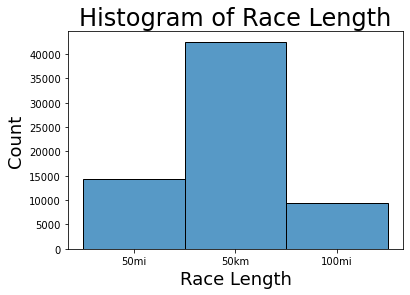

In [44]:
sns.histplot(data = df_USA_events_2022, x='Race_Length')
plt.title('Histogram of Race Length')

plt.title('Histogram of Race Length', fontsize=24)

plt.xlabel('Race Length', fontsize=18)

plt.ylabel('Count', fontsize=18)
plt.show()

## Create Histogram of Race Length by Genders

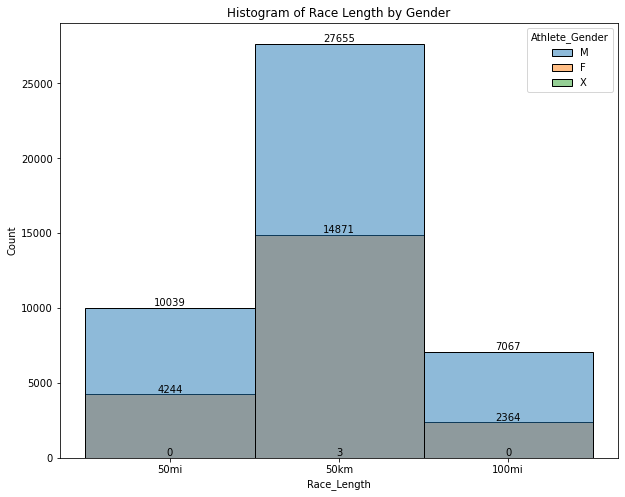

In [45]:
# Sort the DataFrame by 'Race_Length' in descending order
sorted_df = df_USA_events_2022.sort_values(by='Race_Length', ascending=False)

# Create a figure with one subplot for the histogram
fig, ax1 = plt.subplots(figsize=(10, 8))

# Create the histogram using Seaborn with "hue"
sns.histplot(data=sorted_df, x='Race_Length', hue='Athlete_Gender', ax=ax1)

# Add the count numbers on top of the bars
for bar in ax1.patches:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2., height + 0.1, int(height), ha='center', va='bottom')

# Set the title for the graph
ax1.set_title('Histogram of Race Length by Gender')

plt.show()

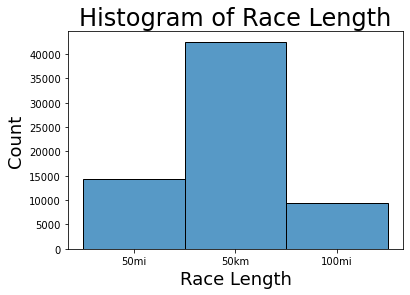

In [46]:
sns.histplot(data = df_USA_events_2022, x='Race_Length')
plt.title('Histogram of Race Length')

plt.title('Histogram of Race Length', fontsize=24)

plt.xlabel('Race Length', fontsize=18)

plt.ylabel('Count', fontsize=18)
plt.show()

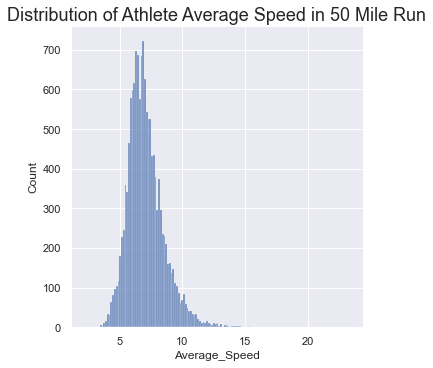

In [47]:
sns.set(rc={'figure.figsize': (20, 12)})

sns.displot(data=df_USA_events_2022[df_USA_events_2022['Race_Length'] == '50mi'], x='Athlete_Average_Speed')

plt.title('Distribution of Athlete Average Speed in 50 Mile Run', fontsize=18)

plt.xlabel('Average_Speed', fontsize=12)
xticks = list(range(0, 15, 3))

plt.ylabel('Count', fontsize=12)


# Show the plot
plt.show()

In [48]:
Overall_mean_speed = df_USA_events_2022['Athlete_Average_Speed'].mean()
Overall_mean_speed

7.0933802514983535

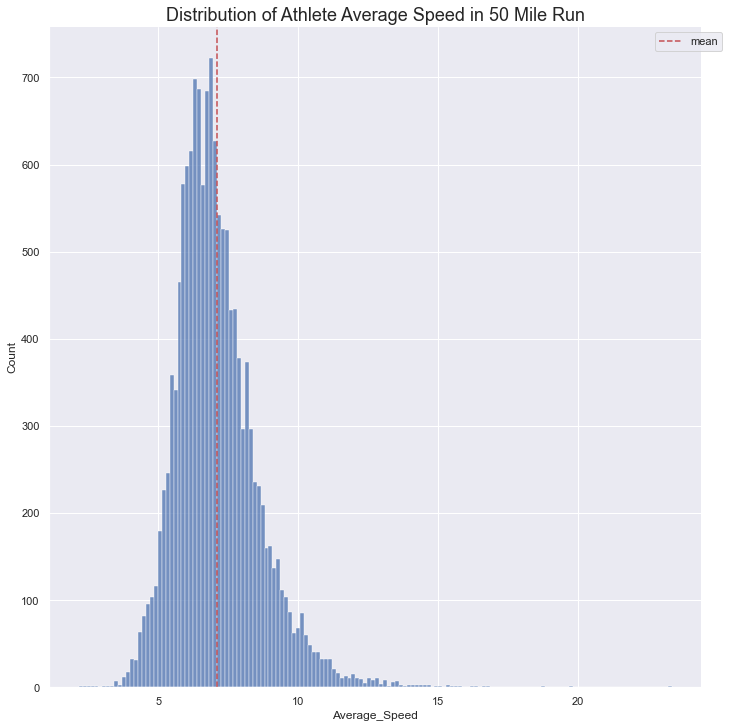

In [49]:
sns.set(rc={'figure.figsize': (20, 12)})

# Create the displot with the modified size
plot = sns.displot(data=df_USA_events_2022[df_USA_events_2022['Race_Length'] == '50mi'], x='Athlete_Average_Speed', height=10, aspect=1)

plt.axvline(x=Overall_mean_speed, color='r', linestyle = '--', label = 'mean')

plt.title('Distribution of Athlete Average Speed in 50 Mile Run', fontsize=18)

plt.xlabel('Average_Speed', fontsize=12)

plt.ylabel('Count', fontsize=12)

plt.legend(bbox_to_anchor=(1.04,1))


# Customize the x-axis ticks
xticks = list(range(0, 15, 2))  # Define the positions for x-axis labels (every 5 units)
xtick_labels = [str(x) for x in xticks]  # Convert positions to labels




# Show the plot
plt.show()

# Questions to Answer Reagrding the UltraMarathoners in 2022 

## Difference in Speed of Males & Females For The 50km, 50mi 

In [50]:
# Perform the groupby and calculate the mean
grouped = df_USA_events_2022.groupby(['Race_Length', 'Athlete_Gender']) \
['Athlete_Average_Speed'].mean()

# Convert the result into a table
table = pd.pivot_table(df_USA_events_2022, index=['Race_Length', 'Athlete_Gender'], 
                       values='Athlete_Average_Speed', aggfunc='mean').reset_index()

print(table)

  Race_Length Athlete_Gender  Athlete_Average_Speed
0       100mi              F               5.829741
1       100mi              M               5.956413
2        50km              F               6.966948
3        50km              M               7.562757
4        50km              X               8.444000
5        50mi              F               6.779096
6        50mi              M               7.218046


## Which age groups have the highest average speed score in 50 mile race 

In [51]:
df_USA_events_2022.query('Race_Length == "50mi"') \
.groupby('Athlete_Age')['Athlete_Average_Speed'].agg(['mean','count']) \
.sort_values('mean', ascending =False).query('count>19').head(10)

,mean,count
Athlete_Age,,
19,7.781079,38
26,7.750676,262
20,7.633224,67
32,7.560600,418
24,7.526565,186
25,7.477597,206
28,7.428883,325
31,7.424462,394
27,7.418414,256


## Which age groups have the slowest average speed score in 50 mile race 

In [52]:
df_USA_events_2022.query('Race_Length == "50mi"') \
.groupby('Athlete_Age')['Athlete_Average_Speed'].agg(['mean','count']) \
.sort_values('mean', ascending =True).query('count>19').head(10)

,mean,count
Athlete_Age,,
68,5.758423,26
69,5.976714,28
65,5.990196,51
67,6.089679,28
66,6.120250,40
64,6.263042,71
63,6.499551,89
60,6.514132,144
55,6.590199,211


#### In the 50 mile races that occured in 2022 in USA, age group of 19 year olds were on average the fastest runners amoungst every other age group. 68 year olds werre the slowest runners on average.

## Which age groups have the highest average speed score in 50KM race 

In [53]:
df_USA_events_2022.query('Race_Length == "50km"') \
.groupby('Athlete_Age')['Athlete_Average_Speed'].agg(['mean','count']) \
.sort_values('mean', ascending =False).query('count>19').head(10)

,mean,count
Athlete_Age,,
25,8.040827,566
24,8.005877,487
22,7.958292,277
19,7.917549,91
23,7.894259,351
26,7.872757,699
27,7.843038,819
18,7.788680,50
31,7.767189,1172


## Which age groups have the slowest average speed score in 50KM race 

In [54]:
df_USA_events_2022.query('Race_Length == "50km"') \
.groupby('Athlete_Age')['Athlete_Average_Speed'].agg(['mean','count']) \
.sort_values('mean', ascending =True).query('count>19').head(10)

,mean,count
Athlete_Age,,
71,5.959507,71
75,6.005857,28
73,6.044640,50
69,6.099855,110
74,6.181968,31
68,6.264952,124
70,6.268319,94
67,6.276692,159
72,6.337925,53


#### There were 566 25 year old that participated in a 50 KM run in the USA and on average they were the fastest out of other age groups. An inspiring 71 people particpated in a 50 KM runs, who were 71 years old, and they average speeds were the lowest amoungst all other age groups.

## Which age groups have the highest average speed score in 100 mile race 


In [55]:
df_USA_events_2022.query('Race_Length == "100mi"') \
.groupby('Athlete_Age')['Athlete_Average_Speed'].agg(['mean','count']) \
.sort_values('mean', ascending =False).query('count>19').head(10)

,mean,count
Athlete_Age,,
31,6.278260,204
26,6.247811,106
25,6.238792,72
29,6.228077,168
27,6.186673,104
30,6.168005,189
32,6.114579,233
38,6.114063,331
36,6.090886,299


## Which age groups have the slowest average speed score in 100 mile race 

In [56]:
df_USA_events_2022.query('Race_Length == "100mi"') \
.groupby('Athlete_Age')['Athlete_Average_Speed'].agg(['mean','count']) \
.sort_values('mean', ascending =True).query('count>19').head(10)

,mean,count
Athlete_Age,,
65,4.994480,25
70,5.301792,24
63,5.456407,59
64,5.462210,62
61,5.504960,101
62,5.505509,57
60,5.617517,118
59,5.626454,108
58,5.671540,87


## Does the season of the event affect the speed of the athletes? 

In [57]:
# encoding the season with the following:

## spring: 3-5
## summer: 6-8
## fall: 9-11
## winter 12-2

### Split the race month number from strat date

In [58]:
df_USA_events_2022['Race_Month'] = df_USA_events_2022['Start_date'].str.split('.').str.get(1).astype(int)

In [59]:
df_USA_events_2022['Race_Season'] = df_USA_events_2022['Race_Month'] \
.apply(lambda x: 'Winter' if x > 11 else 'Fall' if x > 8 else 'Summer' if x > 5 else 'Spring' if x > 2 else 'Winter')

In [60]:
df_USA_events_2022

,Year,Start_date,End_date,Race_Name,Race_Length,Race_Number_of_Finishers,Athlete_ID,Athlete_Gender,Athlete_Age,Athlete_Average_Speed,Athlete_Performance,Host_Country,Race_Month,Race_Season
3138208,2022,12.03.2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,839364,M,28,10.194,7:53:36,USA,3,Spring
3138209,2022,12.03.2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,366598,M,32,9.765,8:14:24,USA,3,Spring
3138210,2022,12.03.2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,553476,M,43,9.670,8:19:16,USA,3,Spring
3138211,2022,12.03.2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,807555,M,28,9.583,8:23:49,USA,3,Spring
3138212,2022,12.03.2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,947348,M,25,9.256,8:41:37,USA,3,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609801,2022,16.10.2022,16.10.2022,Tussey Mountainback 50 Miler,50mi,35,1044739,M,54,7.141,11:16:08,USA,10,Fall
3609802,2022,16.10.2022,16.10.2022,Tussey Mountainback 50 Miler,50mi,35,50971,M,63,7.027,11:27:05,USA,10,Fall
3609803,2022,16.10.2022,16.10.2022,Tussey Mountainback 50 Miler,50mi,35,73152,F,67,6.833,11:46:34,USA,10,Fall
3609804,2022,16.10.2022,16.10.2022,Tussey Mountainback 50 Miler,50mi,35,970133,M,57,6.748,11:55:29,USA,10,Fall


## Average athlete speed and number of races in different season (overall)

In [61]:
df_USA_events_2022.groupby('Race_Season')['Athlete_Average_Speed'].agg(['mean','count']).sort_values('mean', ascending = False)

,mean,count
Race_Season,,
Winter,7.563729,9910
Spring,7.176918,19214
Fall,7.056963,21515
Summer,6.742013,15604


## Average athlete speed and number of races in different season (50 miles)

In [62]:
df_USA_events_2022.query('Race_Length == "50mi"').groupby('Race_Season')['Athlete_Average_Speed'].agg(['mean','count']).sort_values('mean', ascending = False)

,mean,count
Race_Season,,
Winter,7.361231,1570
Fall,7.301296,4600
Spring,7.071688,4433
Summer,6.722977,3680


## Average athlete speed and number of races in different season (50km)

In [63]:
df_USA_events_2022.query('Race_Length == "50km"').groupby('Race_Season')['Athlete_Average_Speed'].agg(['mean','count']).sort_values('mean', ascending = False)

,mean,count
Race_Season,,
Winter,7.811382,7243
Spring,7.353396,13364
Fall,7.272038,13169
Summer,7.102110,8753


## Average athlete speed and number of races in different season (100mi)

In [64]:
df_USA_events_2022.query('Race_Length == "100mi"').groupby('Race_Season')['Athlete_Average_Speed'].agg(['mean','count']).sort_values('mean', ascending = False)

,mean,count
Race_Season,,
Winter,6.218396,1097
Fall,6.000835,3746
Spring,5.841723,1417
Summer,5.770119,3171


#### On average an atlethe's speed is higher during Winter and lowest during Summer. This is due to weather condition being more suitble for a run during winter 

In [71]:
# Export the DataFrame to a CSV file
df_USA_events_2022.to_csv('USA_Events_2022.csv', index= False)  